In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re
import string

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# Step by Step How this Project is built

# 1. Data Cleaning
# 2. EDA (Exploratory Data Analysis)
# 3. Data Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Model Deployment


## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Droping unwanted columns

In [97]:
#df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.sample(5)

,Target,Text,num_Characters,num_words,num_sentences,transformed_text
714,0,He also knows about lunch menu only da. . I know,48,11,2,also know lunch menu da know
4291,0,G.W.R,5,1,2,
2484,0,Only if you promise your getting out as SOON a...,124,28,2,promis get soon text morn let know made ok
2118,1,U can WIN å£100 of Music Gift Vouchers every w...,160,24,3,u win music gift voucher everi week start txt ...
2231,0,"K, wen ur free come to my home and also tel vi...",130,28,2,k wen ur free come home also tel vikki hav sen...


In [98]:
# Renaming the cols
df.rename(columns={'v1':"Target",'v2':"Text"},inplace=True)

In [99]:
encoder = LabelEncoder()

In [100]:
df["Target"]=encoder.fit_transform(df['Target'])

In [101]:
df.head()

,Target,Text,num_Characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf live around though


In [102]:
# Missing Values
df.isnull().sum()

Target              0
Text                0
num_Characters      0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

In [103]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [104]:
# Remove duplicate value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [105]:
df.shape

(5169, 6)

# EDA 

In [106]:
df.head()

,Target,Text,num_Characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf live around though


In [107]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

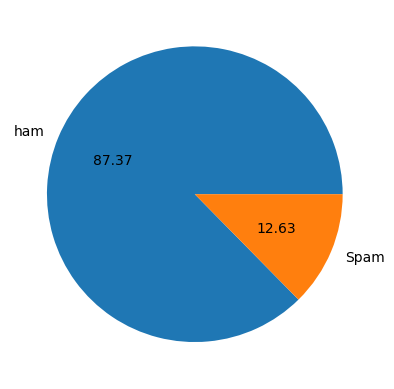

In [108]:
plt.pie(df['Target'].value_counts(),labels=["ham","Spam"],autopct='%0.2f')
plt.show()

In [109]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
df['num_Characters']=df["Text"].apply(len)

In [111]:
df['num_words'] = df['Text'].fillna("").apply(lambda x: len(x.split()))
df['num_sentences'] = df['Text'].fillna("").apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

In [112]:
df.head()

,Target,Text,num_Characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf live around though


In [113]:
df[['num_Characters', 'num_words', 'num_sentences']].describe()

,num_Characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [114]:
#Hem
df[df['Target'] == 0][['num_Characters', 'num_words', 'num_sentences']].describe()


,num_Characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [115]:
# Spam Messages
df[df['Target'] == 1][['num_Characters', 'num_words', 'num_sentences']].describe()


,num_Characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


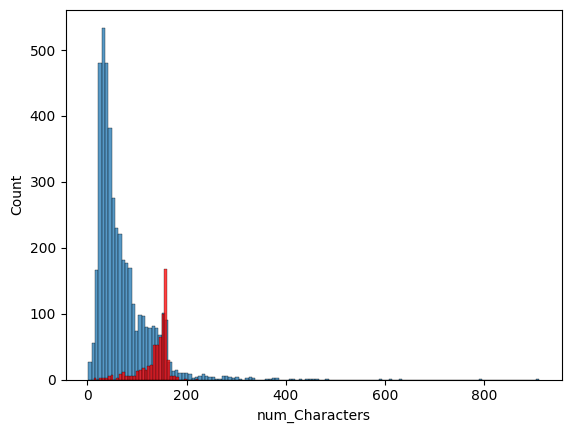

In [116]:
sns.histplot(df[df['Target']==0]['num_Characters'])
sns.histplot(df[df['Target']==1]['num_Characters'],color='red')
plt.show()

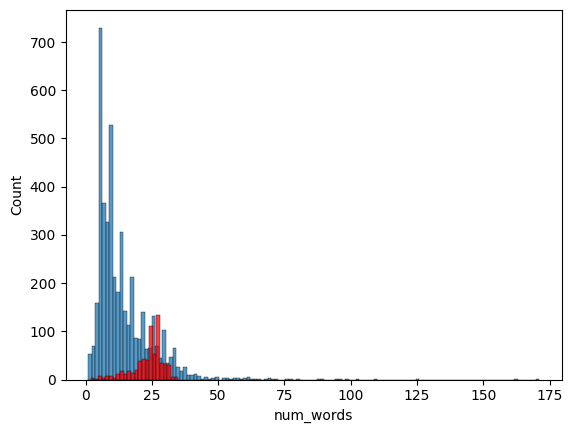

In [117]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')
plt.show()

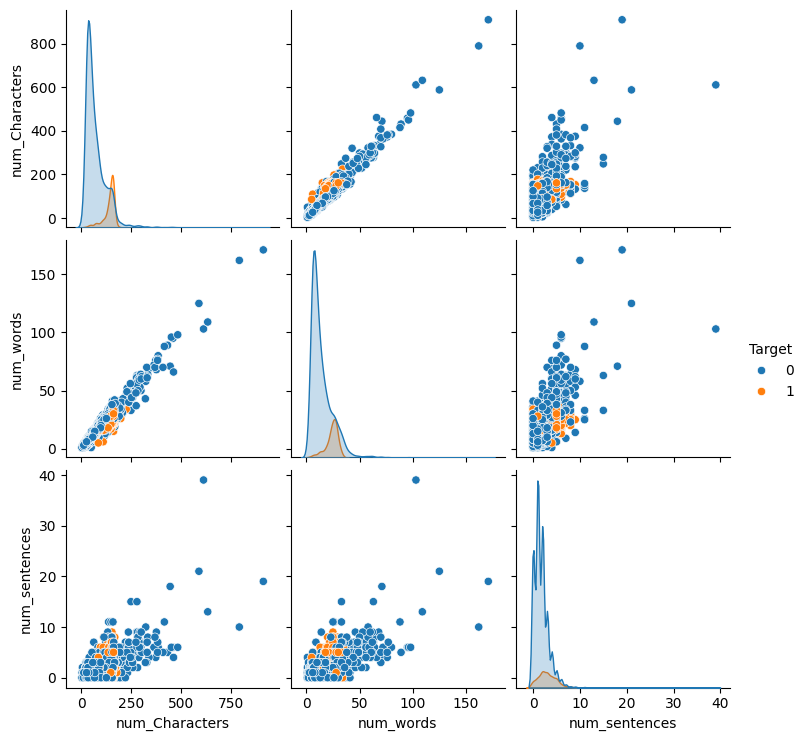

In [118]:
sns.pairplot(df,hue='Target')
plt.show()

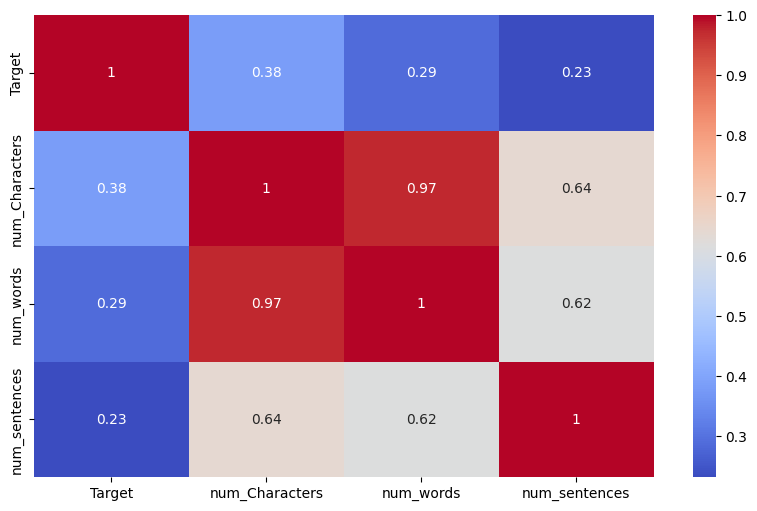

In [119]:
numeric_df = df.select_dtypes(include=['number'])  # keep only numeric columns
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Data Preprocessing

In [120]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer

# Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize the text

    y = []
    # Keep only alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)





In [122]:
print(transform_text("I love programming in Python! It's amazing.")) 

love program python amaz


In [123]:
df["transformed_text"]=df['Text'].apply(transform_text)

In [124]:
df.head()

,Target,Text,num_Characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf live around though


In [125]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,background_color='white',min_font_size=10).generate(df['transformed_text'].str.cat(sep=" "))

In [126]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

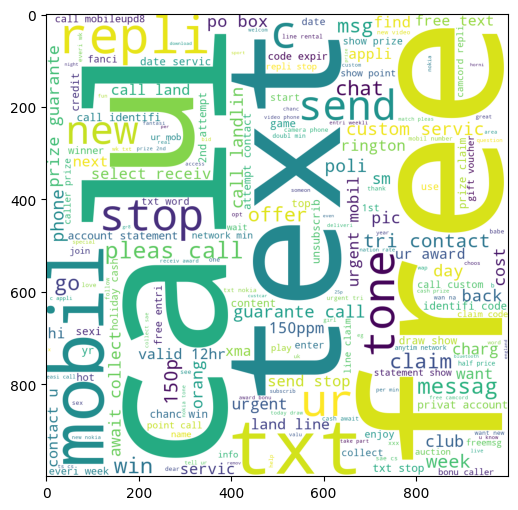

In [127]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

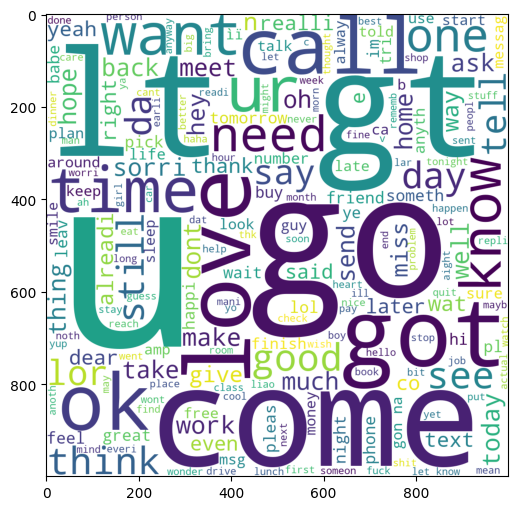

In [128]:
hem_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(hem_wc)

In [129]:
df.head()

,Target,Text,num_Characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf live around though


In [130]:
spam_corpus = []

for msg in df[df["Target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [131]:
len(spam_corpus)

9939

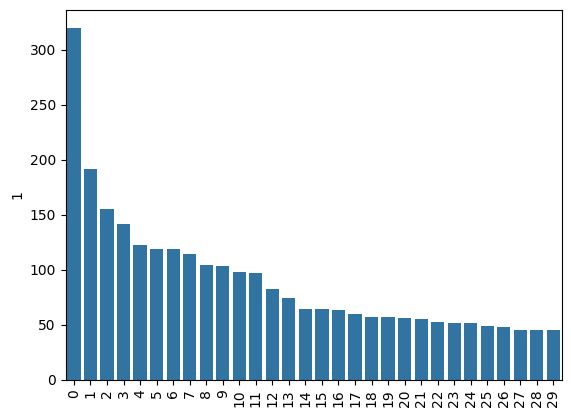

In [132]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [133]:
hem_corpus = []

for msg in df[df["Target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        hem_corpus.append(word)


In [134]:
len(hem_corpus)

35404

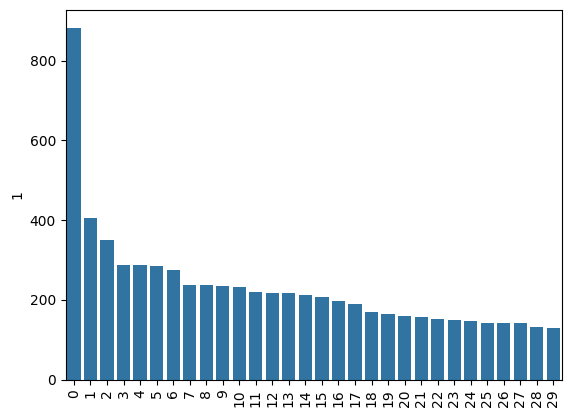

In [135]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(hem_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [141]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [142]:
x.shape

(5169, 6708)

In [143]:
y = df['Target'].values

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)
